In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [47]:
#Loan dataset
df = pd.read_csv("Datasets/loan_data.csv")
print(df)

       person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   O

In [48]:
print("Shape")
df.shape


Shape


(45000, 14)

In [28]:
print("Describe")
df.describe()


Describe


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Outliers found! age = 144, person_income = 72 lakh

In [29]:
print("columns")
df.columns

columns


Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [30]:
df.isnull().sum()
(df.isnull().mean() * 100).sort_values(ascending=False)

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

No Null values.


In [31]:
#including previous_loan_defaults_on_file
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({
    'Yes': 1,
    'No': 0
})

#column selection

num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
        'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
       dtype='object'),
 Index(['person_gender', 'person_education', 'person_home_ownership',
        'loan_intent'],
       dtype='object'))

In [32]:
df[num_cols].describe()
#df[num_cols].median()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


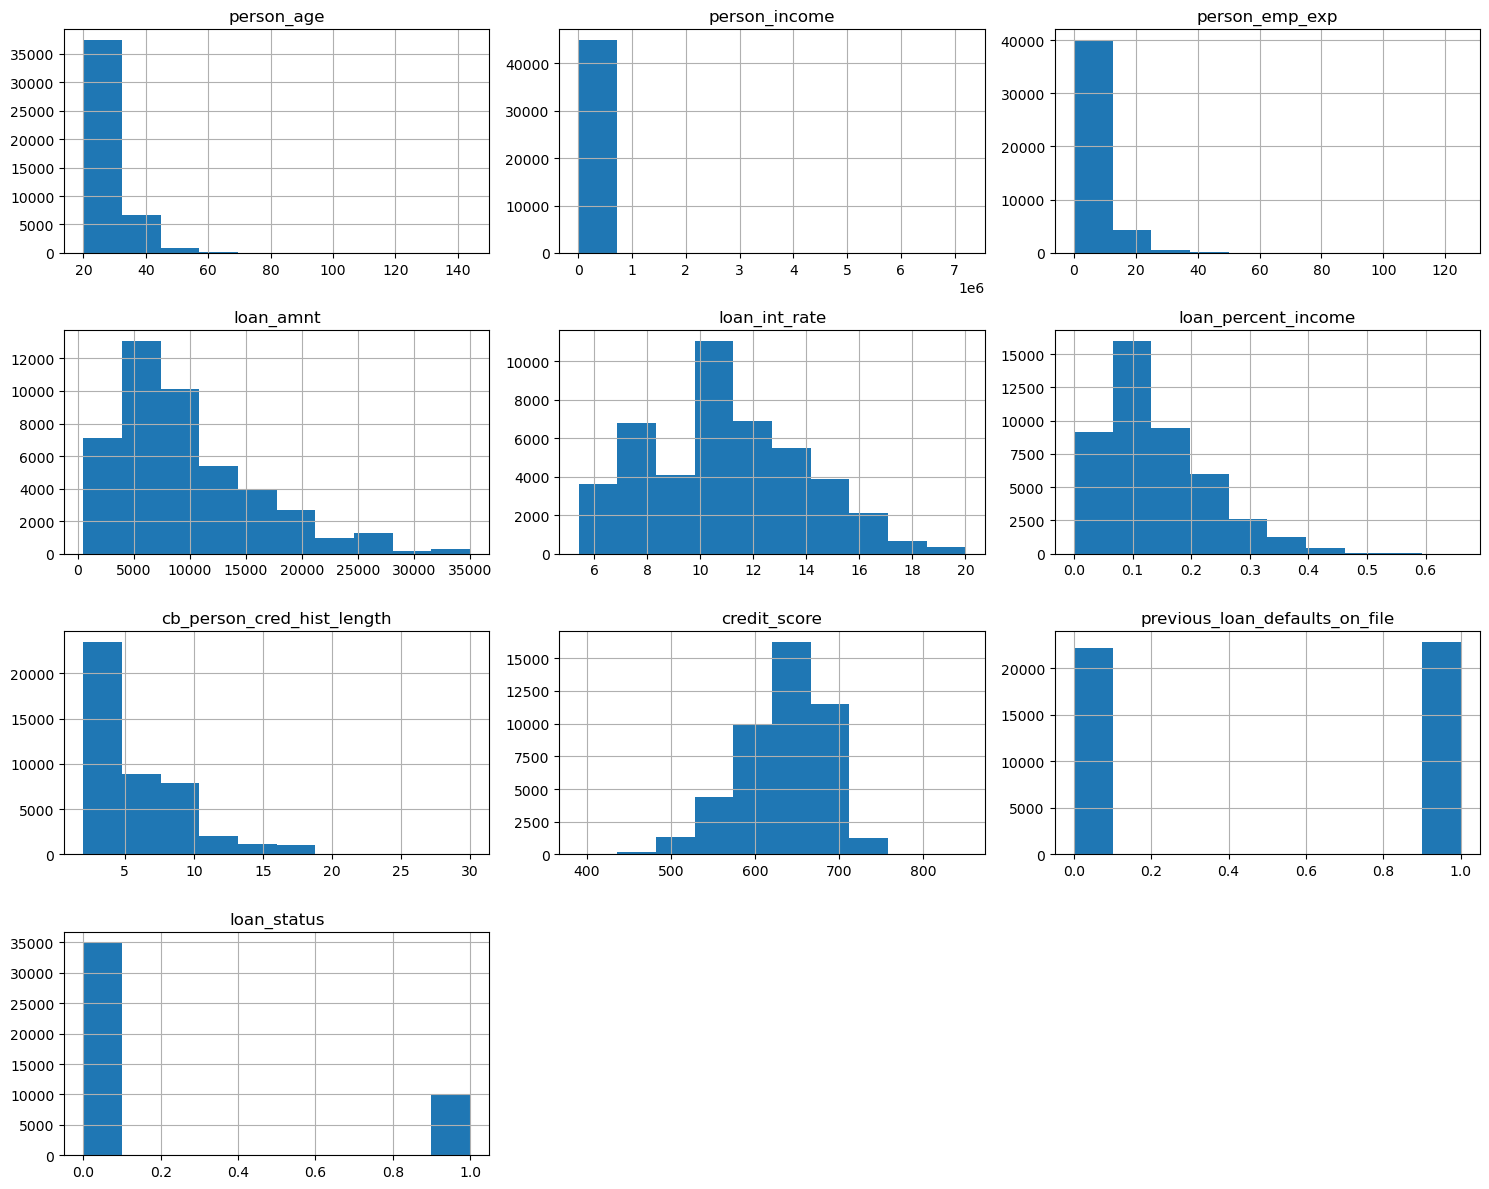

In [33]:
df[num_cols].hist(figsize=(15,12))
plt.tight_layout()
plt.show()

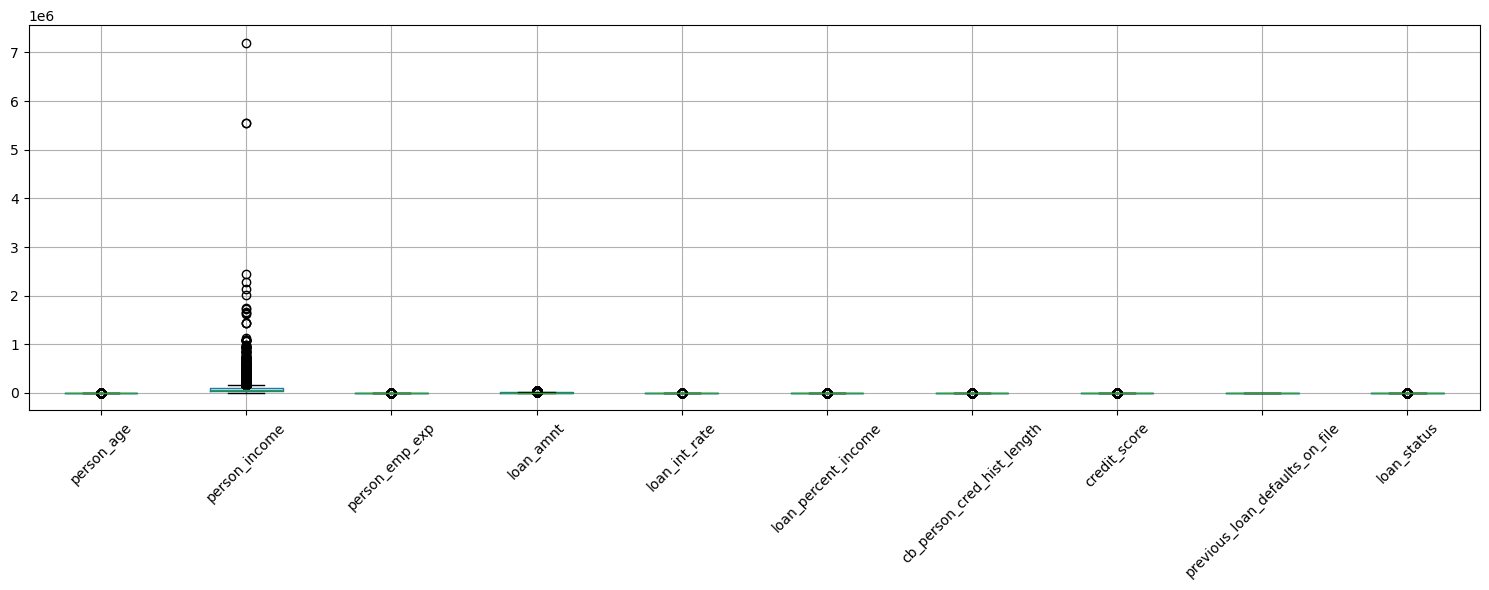

In [34]:
#box plot
plt.figure(figsize=(15, 6))
df[num_cols].boxplot(rot=45)
plt.tight_layout()
plt.show()

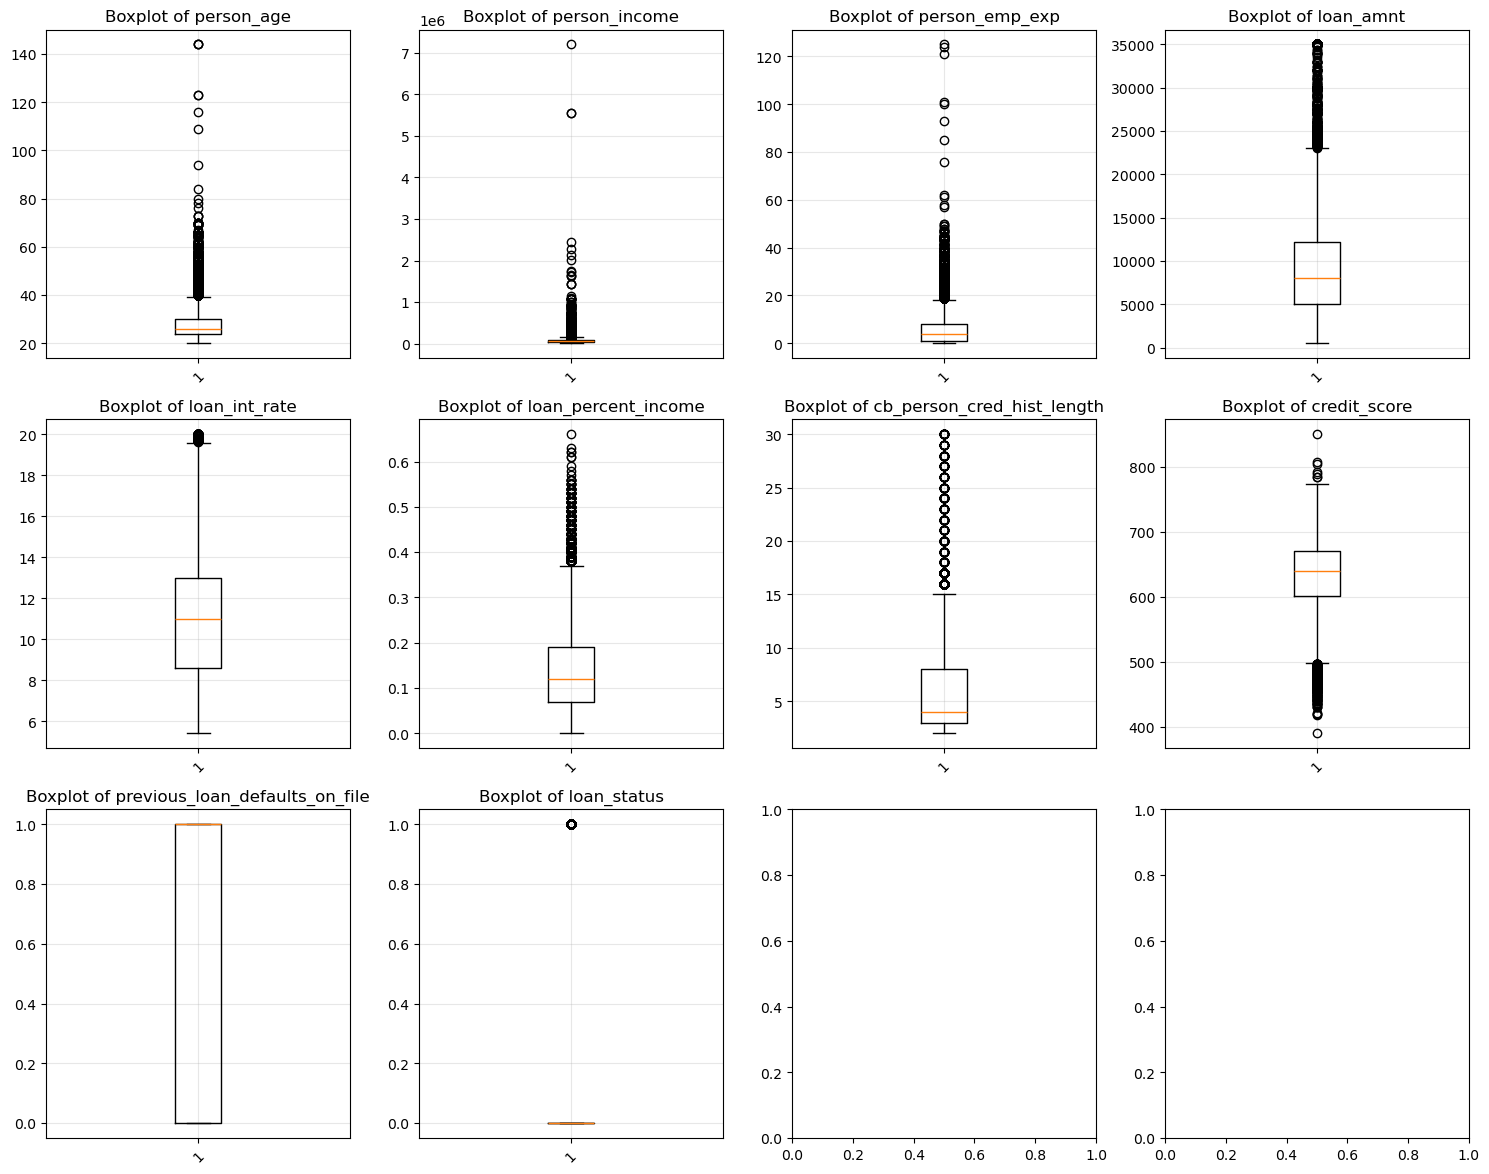

In [35]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [36]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_outliers = (df[col] < lower_bound).sum()
    upper_outliers = (df[col] > upper_bound).sum()

    outlier_summary[col] = {
        "Lower Outliers": lower_outliers,
        "Upper Outliers": upper_outliers,
        "Total Outliers": lower_outliers + upper_outliers
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df


,Lower Outliers,Upper Outliers,Total Outliers
person_age,0,2188,2188
person_income,0,2218,2218
person_emp_exp,0,1724,1724
loan_amnt,0,2348,2348
loan_int_rate,0,124,124
loan_percent_income,0,744,744
cb_person_cred_hist_length,0,1366,1366
credit_score,460,7,467
previous_loan_defaults_on_file,0,0,0
loan_status,0,10000,10000


In [37]:
#winorization
df_capped = df.copy()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped[col] = df_capped[col].clip(lower_bound, upper_bound)


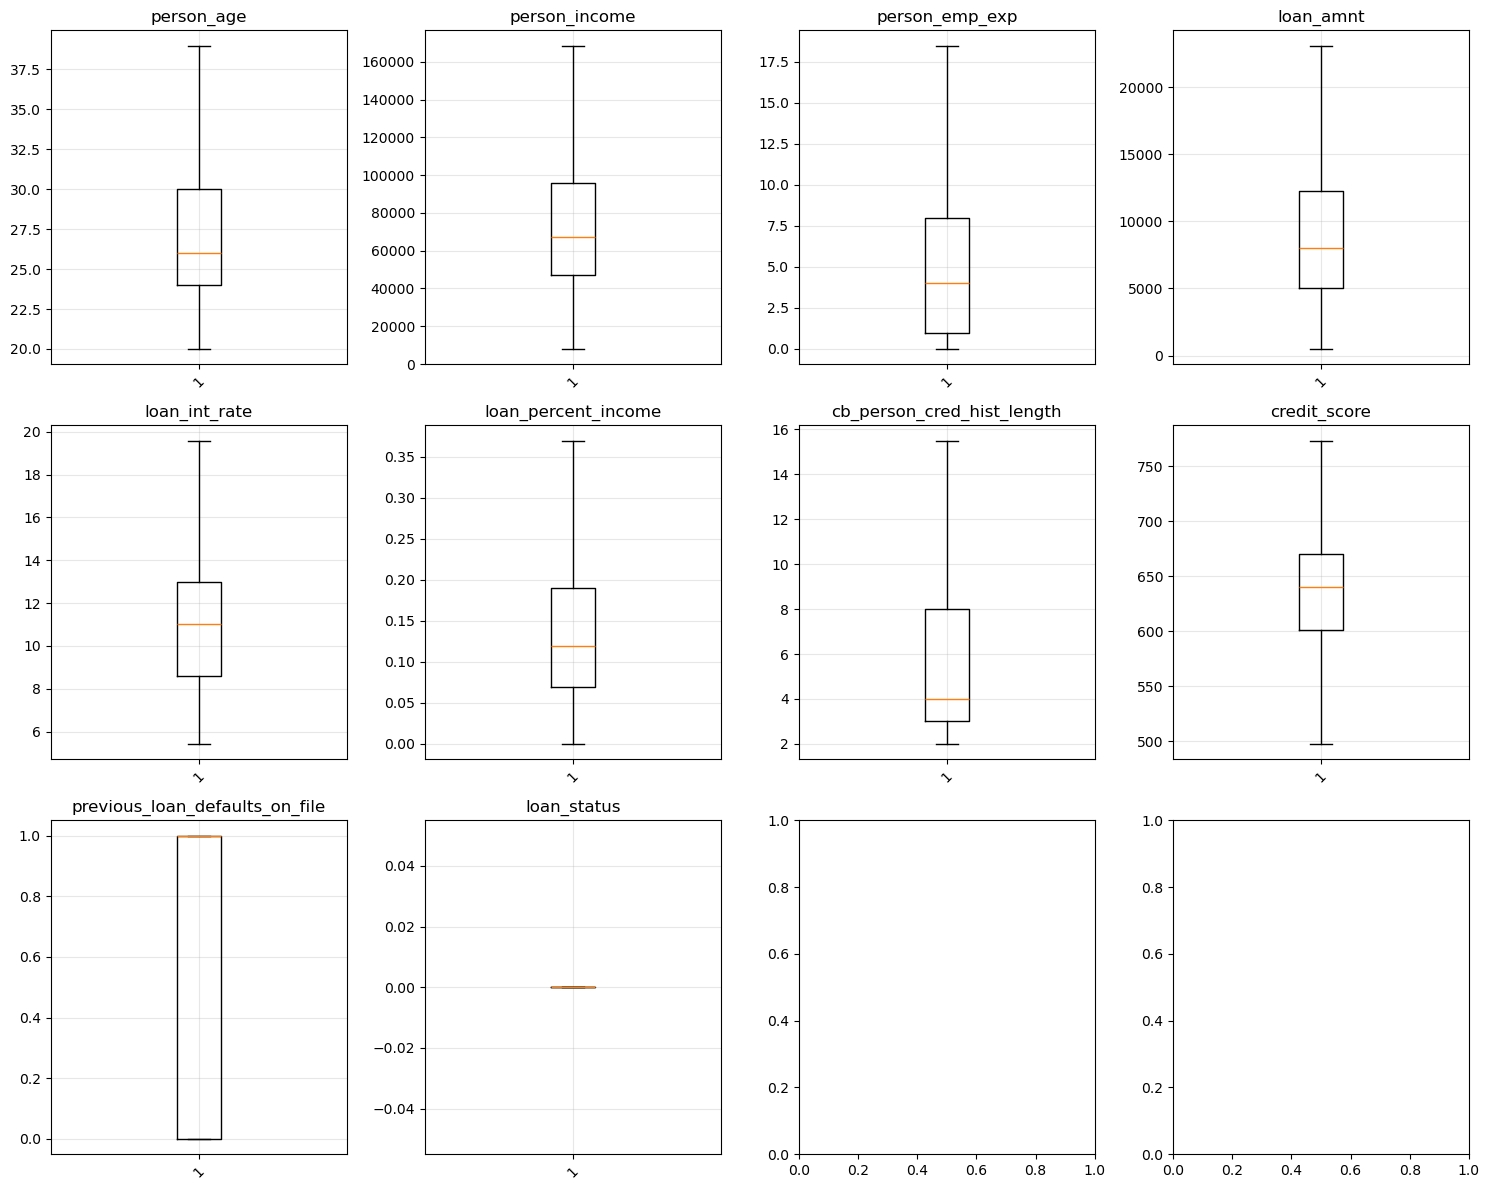

In [38]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_capped[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


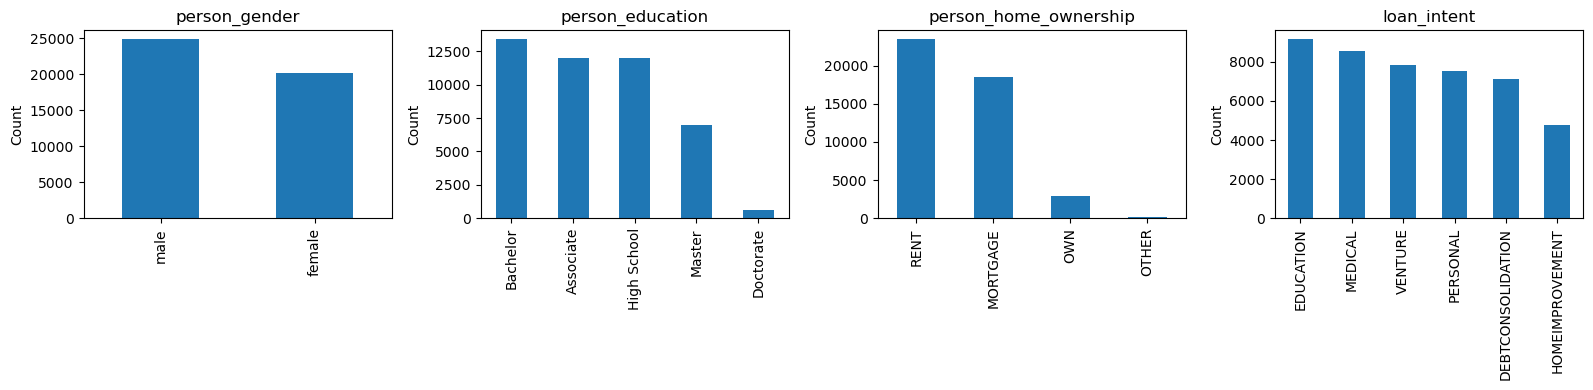

In [39]:
ncols = 5
nrows = (len(cat_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(20, 4 * nrows)
)

# Make axes always a flat array
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

# Plot each categorical column
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

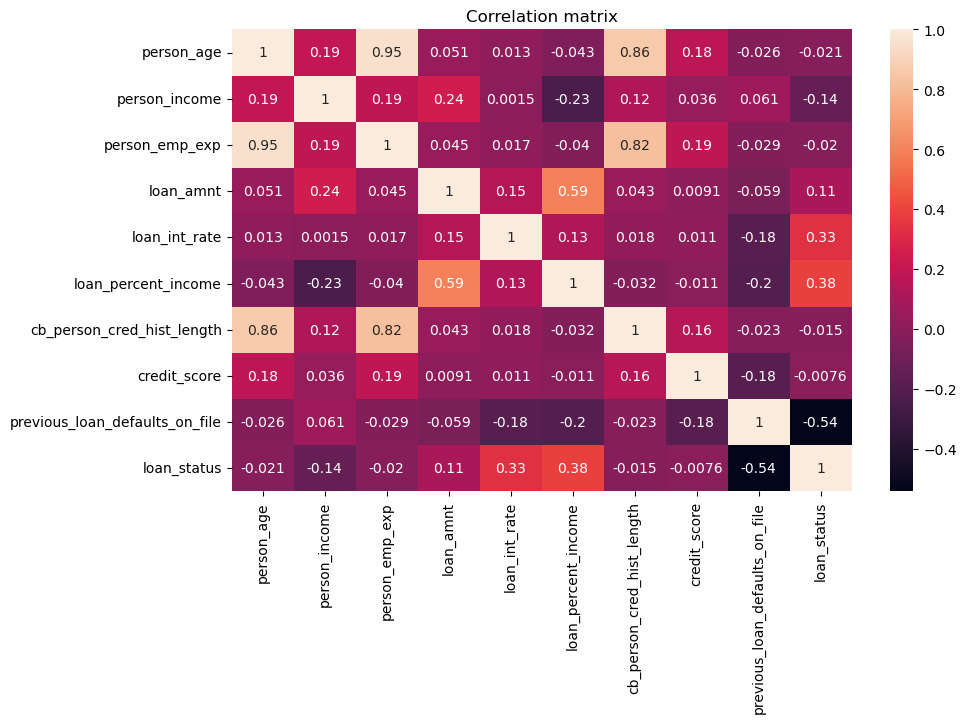

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlation matrix")
plt.show()

In [41]:
y = df['loan_status']
X = df.drop(columns=['loan_status'])

num_cols = [col for col in num_cols if col != 'loan_status']

In [42]:
# ANOVA

selector = SelectKBest(score_func=f_classif, k=5)
X_anova_selected = selector.fit_transform(X[num_cols], y)

anova_scores = pd.DataFrame({
    'Feature': num_cols,
    'ANOVA F-Score': selector.scores_
}).sort_values(by='ANOVA F-Score', ascending=False)

anova_scores


,Feature,ANOVA F-Score
8,previous_loan_defaults_on_file,18824.727466
5,loan_percent_income,7824.794030
4,loan_int_rate,5574.454260
1,person_income,845.525887
3,loan_amnt,528.213632
0,person_age,20.763596
2,person_emp_exp,18.883771
6,cb_person_cred_hist_length,9.926174
7,credit_score,2.631606


In [43]:
selected_features = [
    'previous_loan_defaults_on_file',
    'loan_percent_income',
    'loan_int_rate',
    'person_income',
    'loan_amnt'
]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,        # 30% → temp
    random_state=42,
    stratify=y             # IMPORTANT for imbalanced classes
)


X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,        # split 30% into 15% + 15%
    random_state=42,
    stratify=y_temp
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Training set: (31500, 13)
Validation set: (6750, 13)
Test set: (6750, 13)


In [45]:
#to verify class imbalance
def class_distribution(y, name):
    print(f"{name} class distribution:")
    print(y.value_counts(normalize=True))
    print()

class_distribution(y_train, "Train")
class_distribution(y_val, "Validation")
class_distribution(y_test, "Test")


Train class distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

Validation class distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

Test class distribution:
loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64



Similar score, so there is no class imbalance
